In [12]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from wrangle import prep_pola, wrangle_pola

import tabula

import os
import requests
import pandas as pd

In [2]:
df = wrangle_pola()
df.head(20)

,num_at_anchor,num_at_berth,departed,avg_days_at_berth,avg_days_anchor_berth
date,,,,,
2015-03-17,15.0,16.0,5.0,4.00,9.40
2015-03-18,12.0,16.0,3.0,5.30,6.00
2015-03-19,13.0,17.0,5.0,5.60,12.20
2015-03-20,10.0,16.0,5.0,2.40,3.80
2015-03-23,8.0,15.0,2.0,4.00,15.50
2015-03-24,8.0,15.0,2.0,4.50,10.50
2015-03-25,8.0,16.0,4.0,5.00,6.75
2015-03-26,8.0,15.0,7.0,4.85,7.42
2015-03-27,7.0,12.0,1.0,5.00,9.00


In [ ]:
df.iloc[97]

In [3]:
df['year'] = pd.DatetimeIndex(df.index).year
df['month'] = pd.DatetimeIndex(df.index).month
df['day'] = pd.DatetimeIndex(df.index).day

In [4]:
df['backlog'] = df.avg_days_anchor_berth - df.avg_days_at_berth
df.head()

,num_at_anchor,num_at_berth,departed,avg_days_at_berth,avg_days_anchor_berth,year,month,day,backlog
date,,,,,,,,,
2015-03-17,15.0,16.0,5.0,4.0,9.4,2015,3,17,5.4
2015-03-18,12.0,16.0,3.0,5.3,6.0,2015,3,18,0.7
2015-03-19,13.0,17.0,5.0,5.6,12.2,2015,3,19,6.6
2015-03-20,10.0,16.0,5.0,2.4,3.8,2015,3,20,1.4
2015-03-23,8.0,15.0,2.0,4.0,15.5,2015,3,23,11.5


In [5]:
df.sample(20)

,num_at_anchor,num_at_berth,departed,avg_days_at_berth,avg_days_anchor_berth,year,month,day,backlog
date,,,,,,,,,
2015-12-03,0.0,8.0,4.0,2.25,2.25,2015,12,3,0.00
2017-12-07,0.0,12.0,4.0,2.50,2.50,2017,12,7,0.00
2015-07-08,1.0,10.0,3.0,1.66,2.00,2015,7,8,0.34
2017-05-24,0.0,11.0,3.0,2.00,2.00,2017,5,24,0.00
2016-09-28,0.0,8.0,3.0,2.00,2.00,2016,9,28,0.00
2018-12-17,0.0,11.0,7.0,3.71,3.71,2018,12,17,0.00
2017-12-14,0.0,13.0,2.0,2.50,2.50,2017,12,14,0.00
2015-07-01,0.0,11.0,1.0,2.00,2.00,2015,7,1,0.00
2015-12-24,0.0,13.0,4.0,1.75,1.75,2015,12,24,0.00


In [6]:
train = df.iloc[:round(len(df)*.7)]
val = df.iloc[round(len(df)*.7):round(len(df)*.85)]
test = df.iloc[round(len(df)*.85):]

In [8]:
train.tail()

,num_at_anchor,num_at_berth,departed,avg_days_at_berth,avg_days_anchor_berth,year,month,day,backlog
date,,,,,,,,,
2017-11-06,0.0,8.0,1.0,2.00,2.00,2017,11,6,0.0
2017-11-07,0.0,9.0,3.0,2.66,2.66,2017,11,7,0.0
2017-11-08,0.0,11.0,2.0,5.50,5.50,2017,11,8,0.0
2017-11-09,0.0,13.0,3.0,1.33,1.33,2017,11,9,0.0
2017-11-13,0.0,7.0,3.0,3.66,3.66,2017,11,13,0.0


In [9]:
y = train.num_at_berth
y.head()

date
2015-03-17    16.0
2015-03-18    16.0
2015-03-19    17.0
2015-03-20    16.0
2015-03-23    15.0
Name: num_at_berth, dtype: float64

AttributeError: module 'matplotlib' has no attribute 'title'

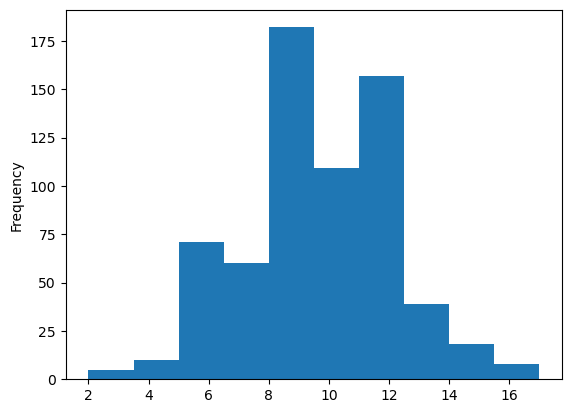

In [15]:
train.num_at_berth.plot.hist()
plt.title('Distribution of Number of Ships Docked')
plt.show()